# Challenge 1 -Básico

## Visualización de grandes bases de datos

### Eyder Uriel Kinil Cervera 


Este challenge introduce a los estudiantes a la visualización de grandes bases de datos utilizando PySpark y Koalas, un API que facilita el trabajo con grandes volúmenes de datos en un entorno de Spark pero con sintaxis similar a pandas.

-- Se reemplaza koalas por pandas

pyspark.pandas (anteriormente conocido como koalas) es una API que permite trabajar con datos distribuidos utilizando una interfaz muy similar a pandas. Es ideal cuando necesitas aprovechar la escalabilidad de Spark pero prefieres la sintaxis y las capacidades de pandas.

## Objetivo

Trabajar con la API de Koalas para ejecutar operaciones básicas de análisis de datos y visualizaciones simples utilizando PySpark (Matplotlib, Plotly, Seabons, pycaret)

In [5]:
#Importando liberías
import findspark
import pyspark
import pyspark.pandas as ps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

In [6]:
#Ruta del csv
file_path = "../globalterrorismdb_0718dist.csv"

In [7]:
#Importando datos del csv con pyspark.pandas
psdf = ps.read_csv(file_path)

In [8]:
#Verificando tamaño de la base de datos con el dataframe de pyspark.pandas
psdf.shape

(181691, 135)

### Notas

Escalabilidad: pyspark.pandas maneja grandes bases de datos, si se trabajo bases de datos muy grandes se debe considerar usar directamente pyspark con spark.read.csv

Conversion a spark dataframe: se realiza para operaciones distribuidas mediante las siguientes operaciones.
- spark_df = df.to_spark()
- spark_df.printShema()

In [9]:
#Conversion a Spark Dataframe
spark_df = psdf.to_spark()

# Mostrar el esquema del DataFrame de Spark
spark_df.printSchema()

root
 |-- eventid: long (nullable = true)
 |-- iyear: integer (nullable = true)
 |-- imonth: integer (nullable = true)
 |-- iday: integer (nullable = true)
 |-- approxdate: string (nullable = true)
 |-- extended: integer (nullable = true)
 |-- resolution: string (nullable = true)
 |-- country: integer (nullable = true)
 |-- country_txt: string (nullable = true)
 |-- region: integer (nullable = true)
 |-- region_txt: string (nullable = true)
 |-- provstate: string (nullable = true)
 |-- city: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- specificity: integer (nullable = true)
 |-- vicinity: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- crit1: string (nullable = true)
 |-- crit2: string (nullable = true)
 |-- crit3: string (nullable = true)
 |-- doubtterr: string (nullable = true)
 |-- alternative: string (nullable = true)
 |-- alternative_txt: string (nullable

In [10]:
#Revisando estructura del dataframe
print(spark_df.dtypes)

[('eventid', 'bigint'), ('iyear', 'int'), ('imonth', 'int'), ('iday', 'int'), ('approxdate', 'string'), ('extended', 'int'), ('resolution', 'string'), ('country', 'int'), ('country_txt', 'string'), ('region', 'int'), ('region_txt', 'string'), ('provstate', 'string'), ('city', 'string'), ('latitude', 'double'), ('longitude', 'double'), ('specificity', 'int'), ('vicinity', 'int'), ('location', 'string'), ('summary', 'string'), ('crit1', 'string'), ('crit2', 'string'), ('crit3', 'string'), ('doubtterr', 'string'), ('alternative', 'string'), ('alternative_txt', 'string'), ('multiple', 'string'), ('success', 'string'), ('suicide', 'string'), ('attacktype1', 'string'), ('attacktype1_txt', 'string'), ('attacktype2', 'string'), ('attacktype2_txt', 'string'), ('attacktype3', 'string'), ('attacktype3_txt', 'string'), ('targtype1', 'string'), ('targtype1_txt', 'string'), ('targsubtype1', 'string'), ('targsubtype1_txt', 'string'), ('corp1', 'string'), ('target1', 'string'), ('natlty1', 'string'), 

### ¿Por qué usar pyspark.pandas?

- Escalabilidad: Permite trabajar con datos distribuidos que no caben en memoria, aprovechando Spark.

- Compatibilidad: La API es casi idéntica a pandas, por lo que es fácil de usar para quienes ya conocen pandas.

- Conversión sencilla: Facilita la conversión entre pyspark.pandas y los DataFrames estándar de PySpark.

### Trabajando con pyspark con la sintaxis de pandas

In [11]:
# Verificando primeras lineas 
psdf.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,None,0,None,58,Dominican Republic,2,Central America & Caribbean,None,Santo Domingo,18.456792,-69.951164,1,0,None,None,1,1,1,0,None,None,0,1,0,1,Assassination,None,None,None,None,14,Private Citizens & Property,68,Named Civilian,None,Julio Guzman,58,Dominican Republic,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,MANO-D,None,None,None,None,None,None,0,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,13,Unknown,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,None,None,0,None,None,0,None,None,None,None,0,None,None,None,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,PGIS,0,0,0,0,None
1,197000000002,1970,0,0,None,0,None,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,None,None,1,1,1,0,None,None,0,1,0,6,Hostage Taking (Kidnapping),None,None,None,None,7,Government (Diplomatic),45,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21,Belgium,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,23rd of September Communist League,None,None,None,None,None,None,0,None,None,0,7,None,None,None,None,None,None,None,None,None,None,None,13,Unknown,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,0,None,None,0,None,None,None,None,1,1,0,None,None,None,Mexico,1,800000,None,None,None,None,None,None,None,None,None,None,None,PGIS,0,1,1,1,None
2,197001000001,1970,1,0,None,0,None,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,None,None,1,1,1,0,None,None,0,1,0,1,Assassination,None,None,None,None,10,Journalists & Media,54,Radio Journalist/Staff/Facility,Voice of America,Employee,217,United States,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Unknown,None,None,None,None,None,None,0,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,13,Unknown,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,None,None,0,None,None,0,None,None,None,None,0,None,None,None,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,PGIS,-9,-9,1,1,None
3,197001000002,1970,1,0,None,0,None,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,None,None,1,1,1,0,None,None,0,1,0,3,Bombing/Explosion,None,None,None,None,7,Government (Diplomatic),46,Embassy/Consulate,None,U.S. Embassy,217,United States,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Unknown,None

In [12]:
# Verificando tipo de datos
psdf.dtypes

eventid        int64
iyear          int32
imonth         int32
iday           int32
approxdate    object
               ...  
INT_LOG       object
INT_IDEO      object
INT_MISC      object
INT_ANY       object
related       object
Length: 135, dtype: object

In [13]:
# Estadistica descriptiva del dataframe 
print(psdf.describe())

            eventid          iyear         imonth           iday       extended        country         region       latitude     longitude    specificity       vicinity
count  1.816910e+05  181691.000000  181691.000000  181691.000000  181691.000000  181691.000000  181691.000000  177135.000000  1.771340e+05  181685.000000  181691.000000
mean   2.002705e+11    2002.638997       6.467277      15.505644       0.045346     131.968501       7.160938      23.498343 -4.586957e+02       1.451452       0.068297
std    1.325957e+09      13.259430       3.388303       8.814045       0.208063     112.414535       2.933408      18.569242  2.047790e+05       0.995430       0.284553
min    1.970000e+11    1970.000000       0.000000       0.000000       0.000000       4.000000       1.000000     -53.154613 -8.618590e+07       1.000000      -9.000000
25%    1.991021e+11    1991.000000       4.000000       8.000000       0.000000      78.000000       5.000000      11.509748  4.481776e+00       1.000000  

In [14]:
psdf['country_txt']

0      Dominican Republic
1                  Mexico
2             Philippines
3                  Greece
4                   Japan
5           United States
6                 Uruguay
7           United States
8           United States
9           United States
10          United States
11          United States
12                  Italy
13          United States
14          United States
15     East Germany (GDR)
16               Ethiopia
17          United States
18          United States
19          United States
20          United States
21                Uruguay
22          United States
23          United States
24          United States
25              Guatemala
26            Philippines
27              Venezuela
28          United States
29          United States
30          United States
31          United States
32          United States
33          United States
34     East Germany (GDR)
35          United States
36          United States
37          United States
38          

In [25]:
#Visualizando garfica de frecuencias por país
psdf['country_txt'].plot.bar()

In [16]:
psdf['iyear']

0      1970
1      1970
2      1970
3      1970
4      1970
5      1970
6      1970
7      1970
8      1970
9      1970
10     1970
11     1970
12     1970
13     1970
14     1970
15     1970
16     1970
17     1970
18     1970
19     1970
20     1970
21     1970
22     1970
23     1970
24     1970
25     1970
26     1970
27     1970
28     1970
29     1970
30     1970
31     1970
32     1970
33     1970
34     1970
35     1970
36     1970
37     1970
38     1970
39     1970
40     1970
41     1970
42     1970
43     1970
44     1970
45     1970
46     1970
47     1970
48     1970
49     1970
50     1970
51     1970
52     1970
53     1970
54     1970
55     1970
56     1970
57     1970
58     1970
59     1970
60     1970
61     1970
62     1970
63     1970
64     1970
65     1970
66     1970
67     1970
68     1970
69     1970
70     1970
71     1970
72     1970
73     1970
74     1970
75     1970
76     1970
77     1970
78     1970
79     1970
80     1970
81     1970
82     1970
83  

In [17]:
psdf['iyear'].plot.line()

In [18]:
# Grafico de frecuencias con matplotlib
colors = plt.cm.rainbow(np.linspace(0, 1, 25))
Country = psdf['country_txt'].value_counts()
Country[:25].plot.bar()

In [19]:
#Gráfico 
Reg = psdf['region_txt'].value_counts()
Reg[:25].plot.bar()

In [20]:
#Gráfico de top de tipo de ataque
Reg = psdf['attacktype1_txt'].value_counts()
Reg[:5].plot.bar()

In [21]:
# Convertir a pandas para utilizar la liberia de seaborn
pandas_df = psdf.to_pandas()

pandas_df = pandas_df.fillna(0)  # Reemplazar valores nulos con 0


# Mostrar el DataFrame convertido
print(pandas_df)


             eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2          0         0          0   
1       197000000002   1970       0     0          0         0          0   
2       197001000001   1970       1     0          0         0          0   
3       197001000002   1970       1     0          0         0          0   
4       197001000003   1970       1     0          0         0          0   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31          0         0          0   
181687  201712310029   2017      12    31          0         0          0   
181688  201712310030   2017      12    31          0         0          0   
181689  201712310031   2017      12    31          0         0          0   
181690  201712310032   2017      12    31          0         0          0   

        country         country_txt  region  ... addnotes  \
0            5

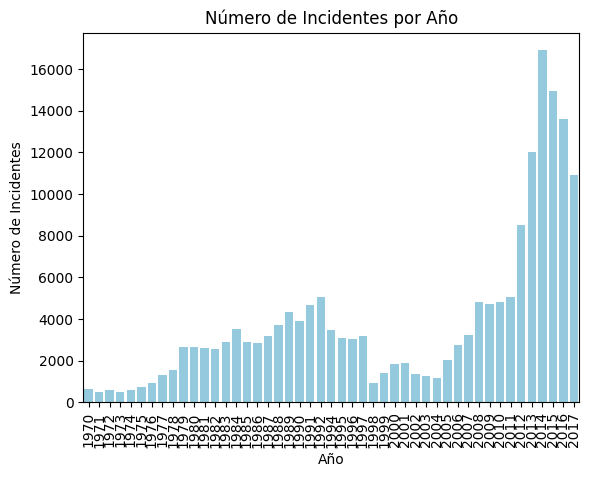

In [22]:
# Gráfico de línea para incidentes por año
sns.countplot(data=pandas_df, x="iyear", color="skyblue")
plt.title("Número de Incidentes por Año")
plt.xlabel("Año")
plt.ylabel("Número de Incidentes")
plt.xticks(rotation=90)
plt.show()

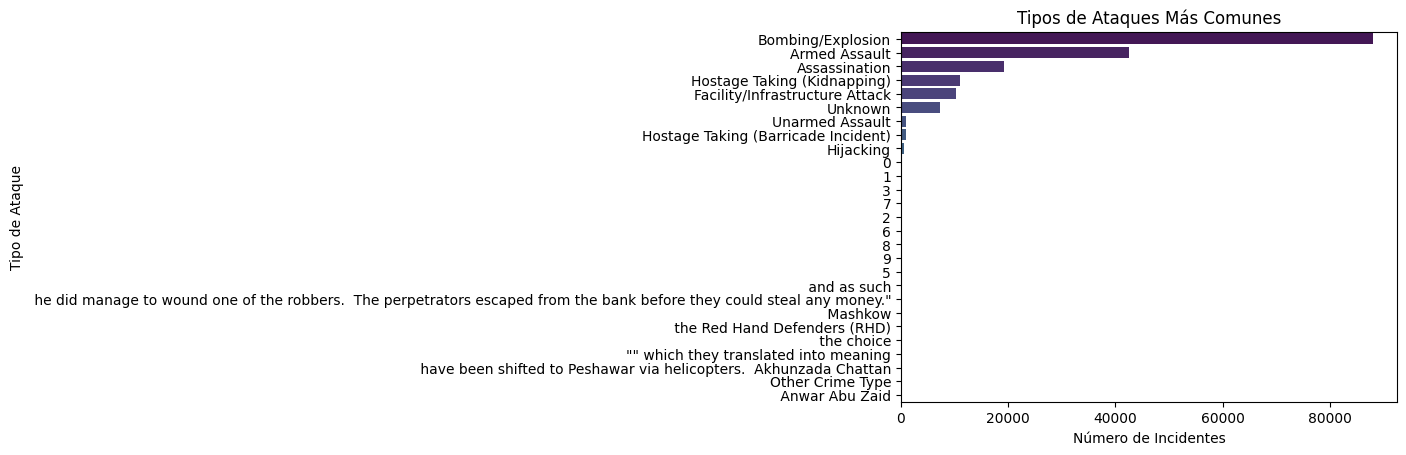

In [23]:
# Gráfico de barras: tipos de ataque
sns.countplot(data=pandas_df, y="attacktype1_txt", order=pandas_df["attacktype1_txt"].value_counts().index, palette="viridis")
plt.title("Tipos de Ataques Más Comunes")
plt.xlabel("Número de Incidentes")
plt.ylabel("Tipo de Ataque")
plt.show()

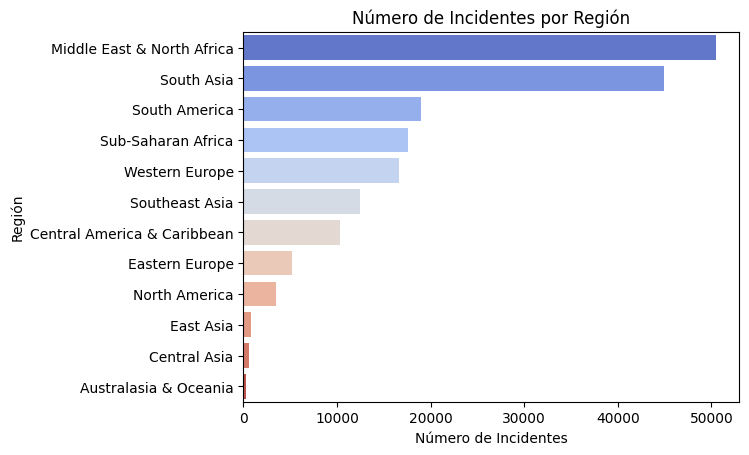

In [24]:
# Gráfico de barras para incidentes por región
sns.countplot(data=pandas_df, y="region_txt", order=pandas_df["region_txt"].value_counts().index, palette="coolwarm")
plt.title("Número de Incidentes por Región")
plt.xlabel("Número de Incidentes")
plt.ylabel("Región")
plt.show()